In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importando dados dos times da API da NBA
from nba_api.stats.endpoints import TeamInfoCommon
from nba_api.stats.static import teams

# Obter a lista de times da NBA
nba_teams = teams.get_teams()

# Criar um dicionário com os IDs dos times
team_ids_dict = {team['full_name']: team['id'] for team in nba_teams}

# Criar um DataFrame vazio para armazenar os dados
df = pd.DataFrame()

# Percorrer os times e adicionar os dados ao DataFrame
for team_name, team_id in team_ids_dict.items():
    team_info = TeamInfoCommon(team_id=team_id)  # Obter informações sobre o time
    df_team = team_info.get_data_frames()[0]  # Selecionar o primeiro DataFrame retornado
    df_team['TeamName'] = team_name  # Adicionar o nome do time ao DataFrame
    df_team['Season'] = '2024-25'  # Adicionar a temporada ao DataFrame
    df = pd.concat([df, df_team], ignore_index=True)  # Concatenar ao DataFrame principal

# Exibir o DataFrame combinado
df


,TEAM_ID,SEASON_YEAR,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CONFERENCE,TEAM_DIVISION,TEAM_CODE,TEAM_SLUG,W,L,PCT,CONF_RANK,DIV_RANK,MIN_YEAR,MAX_YEAR,TeamName,Season
0,1610612737,2024-25,Atlanta,Hawks,ATL,East,Southeast,hawks,hawks,13,12,0.520,7,3,1949,2024,Atlanta Hawks,2024-25
1,1610612738,2024-25,Boston,Celtics,BOS,East,Atlantic,celtics,celtics,19,5,0.792,2,1,1946,2024,Boston Celtics,2024-25
2,1610612739,2024-25,Cleveland,Cavaliers,CLE,East,Central,cavaliers,cavaliers,21,4,0.840,1,1,1970,2024,Cleveland Cavaliers,2024-25
3,1610612740,2024-25,New Orleans,Pelicans,NOP,West,Southwest,pelicans,pelicans,5,20,0.200,15,5,2002,2024,New Orleans Pelicans,2024-25
4,1610612741,2024-25,Chicago,Bulls,CHI,East,Central,bulls,bulls,10,15,0.400,10,4,1966,2024,Chicago Bulls,2024-25
5,1610612742,2024-25,Dallas,Mavericks,DAL,West,Southwest,mavericks,mavericks,16,9,0.640,4,3,1980,2024,Dallas Mavericks,2024-25
6,1610612743,2024-25,Denver,Nuggets,DEN,West,Northwest,nuggets,nuggets,12,10,0.545,7,2,1976,2024,Denver Nuggets,2024-25
7,1610612744,2024-25,Golden State,Warriors,GSW,West,Pacific,warriors,warriors,14,9,0.609,5,1,1946,2024,Golden State Warriors,2024-25
8,1610612745,2024-25,Houston,Rockets,HOU,West,Southwest,rockets,rockets,16,8,0.667,3,2,1967,2024,Houston Rockets,2024-25
9,1610612746,2024-25,LA,Clippers,LAC,West,Pacific,clippers,clippers,14,11,0.560,6,2,1970,2024,Los Angeles Clippers,2024-25


In [2]:
# Coletando da API informações sobre os jogadores da NBA
from nba_api.stats.static import players
player_dict = players.get_players()

In [3]:
# Coletando informações sobre o jogador
nj = [player for player in player_dict if player['full_name'] == 'Nikola Jokić'][0]
nj_id = nj['id']
nj

{'id': 203999,
 'full_name': 'Nikola Jokić',
 'first_name': 'Nikola',
 'last_name': 'Jokić',
 'is_active': True}

In [4]:
# Importando dados da API
from nba_api.stats.endpoints import playergamelog

# Coletando os dados do jogador via api
gamelog_jokic = playergamelog.PlayerGameLog(player_id='203999', season = '2024')
df_jokic_games_2024= gamelog_jokic.get_data_frames()

In [5]:
# Extraindo o DataFrame da lista
df_jokic_games_2024_df = df_jokic_games_2024[0]

# Selecionando as colunas desejadas
selected_columns = ['MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']
df_jokic = df_jokic_games_2024_df[selected_columns]

# Exibindo as primeiras linhas do DataFrame filtrado
print(df_jokic.head(20))

        MATCHUP WL  MIN  FGM  FGA  PTS  REB  AST  PLUS_MINUS
0     DEN @ ATL  W   35   17   29   48   14    8          25
1     DEN @ WAS  L   39   22   39   56   16    8          -1
2     DEN @ CLE  L   39   13   26   27   20   11          -8
3   DEN vs. GSW  W   40   14   24   38   10    6          23
4     DEN @ LAC  L   39   12   24   28   14   11          -7
5     DEN @ UTA  W   34   13   19   30   10    7          20
6   DEN vs. NYK  L   32    9   20   22    7    7         -20
7     DEN @ LAL  W   37   12   20   34   13    8          39
8   DEN vs. DAL  L   39   13   22   33   17   10           4
9   DEN vs. DAL  W   38   13   21   37   18   15          13
10  DEN vs. MIA  W   40   11   13   30   11   14          26
11  DEN vs. OKC  W   39    9   20   23   20   16           8
12  DEN vs. TOR  W   38   10   22   28   14   13          -1
13  DEN vs. UTA  W   30   10   18   27   16    9          31
14    DEN @ MIN  L   40    8   16   26    9   13           6
15    DEN @ BKN  W   41 

In [6]:
# Exibindo a média das colunas selecionadas
average_stats_jokic = df_jokic[['MIN', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']].mean(numeric_only=True).round(1)
print(average_stats_jokic)

MIN           37.7
FGM           12.3
FGA           21.8
PTS           32.3
REB           13.6
AST           10.2
PLUS_MINUS     9.1
dtype: float64


In [7]:
# Salvando o DataFrame em CSV
df_jokic.to_csv('jokic_games_2024.csv', index=False)

In [8]:
# Coletando informações sobre o jogador
jt = [player for player in player_dict if player['full_name'] == 'Jayson Tatum'][0]
jt_id = jt['id']
jt

{'id': 1628369,
 'full_name': 'Jayson Tatum',
 'first_name': 'Jayson',
 'last_name': 'Tatum',
 'is_active': True}

In [9]:
# Coletando os dados do jogador via api
gamelog_tatum = playergamelog.PlayerGameLog(player_id='1628369', season = '2024')
df_tatum_games_2024= gamelog_tatum.get_data_frames()

In [10]:
# Extraindo o DataFrame da lista
df_tatum_games_2024_df = df_tatum_games_2024[0]

# Exibindo o DataFrame
print(df_tatum_games_2024_df.head(20))

   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22024    1628369  0022400345  DEC 07, 2024  BOS vs. MEM  L   38    6   
1      22024    1628369  0022400335  DEC 06, 2024  BOS vs. MIL  W   37   12   
2      22024    1628369  0022400316  DEC 02, 2024  BOS vs. MIA  W   36    7   
3      22024    1628369  0022400307  DEC 01, 2024    BOS @ CLE  L   38   12   
4      22024    1628369  0022400047  NOV 29, 2024    BOS @ CHI  W   36   12   
5      22024    1628369  0022400281  NOV 25, 2024  BOS vs. LAC  W   30    7   
6      22024    1628369  0022400271  NOV 24, 2024  BOS vs. MIN  W   38    8   
7      22024    1628369  0022400028  NOV 22, 2024    BOS @ WAS  W   37    6   
8      22024    1628369  0022400021  NOV 19, 2024  BOS vs. CLE  W   38   11   
9      22024    1628369  0022400230  NOV 16, 2024  BOS vs. TOR  W   42    7   
10     22024    1628369  0022400218  NOV 13, 2024    BOS @ BKN  W   35   12   
11     22024    1628369  0022400001  NOV 12, 2024  B

In [11]:
# Selecionando as colunas desejadas
selected_columns = ['MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']
df_tatum = df_tatum_games_2024_df[selected_columns]

# Exibindo as primeiras linhas do DataFrame filtrado
print(df_tatum.head(20))

        MATCHUP WL  MIN  FGM  FGA  PTS  REB  AST  PLUS_MINUS
0   BOS vs. MEM  L   38    6   21   17   13    9          -3
1   BOS vs. MIL  W   37   12   20   34   10    5          14
2   BOS vs. MIA  W   36    7   21   18   11    4          13
3     BOS @ CLE  L   38   12   27   33    8    4           1
4     BOS @ CHI  W   36   12   18   35   14    5          13
5   BOS vs. LAC  W   30    7   15   20    9    4          15
6   BOS vs. MIN  W   38    8   21   26    8    4           7
7     BOS @ WAS  W   37    6   19   16    9    8          20
8   BOS vs. CLE  W   38   11   22   33   12    7           2
9   BOS vs. TOR  W   42    7   19   24   11    9           1
10    BOS @ BKN  W   35   12   19   36    9   10          24
11  BOS vs. ATL  L   37    5   16   20    6    8           4
12    BOS @ MIL  W   40    7   21   31   12    6           9
13  BOS vs. BKN  W   42   11   25   33    9    6          10
14  BOS vs. GSW  L   37   10   20   32    4    2          -5
15    BOS @ ATL  W   30 

In [12]:
# Exibindo a média das colunas selecionadas
average_stats_tatum = df_tatum[['MIN', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']].mean(numeric_only=True).round(1)
print(average_stats_tatum)

MIN           36.4
FGM            9.1
FGA           20.2
PTS           28.2
REB            8.9
AST            5.7
PLUS_MINUS     9.7
dtype: float64


In [13]:
# Salvando o DataFrame em CSV
df_tatum.to_csv('tatum_games_2024.csv', index=False)

In [14]:
# Coletando informações sobre o jogador
ga = [player for player in player_dict if player['full_name'] == 'Giannis Antetokounmpo'][0]
ga_id = ga['id']
ga

{'id': 203507,
 'full_name': 'Giannis Antetokounmpo',
 'first_name': 'Giannis',
 'last_name': 'Antetokounmpo',
 'is_active': True}

In [15]:
# Coletando os dados do jogador via api
gamelog_antetokounmpo = playergamelog.PlayerGameLog(player_id='203507', season = '2024')
df_antetokounmpo_games_2024= gamelog_antetokounmpo.get_data_frames()

In [16]:
# Extraindo o DataFrame da lista
df_antetokounmpo_games_2024_df = df_antetokounmpo_games_2024[0]

# Exibindo o DataFrame
print(df_antetokounmpo_games_2024_df.head(20))

   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22024     203507  0022401201  DEC 10, 2024  MIL vs. ORL  W   36   15   
1      22024     203507  0022400348  DEC 08, 2024    MIL @ BKN  W   38   14   
2      22024     203507  0022400335  DEC 06, 2024    MIL @ BOS  L   36   13   
3      22024     203507  0022400323  DEC 04, 2024  MIL vs. ATL  L   36    8   
4      22024     203507  0022400052  DEC 03, 2024    MIL @ DET  W   28   10   
5      22024     203507  0022400302  NOV 30, 2024  MIL vs. WAS  W   38   15   
6      22024     203507  0022400268  NOV 23, 2024  MIL vs. CHA  W   31   12   
7      22024     203507  0022400029  NOV 22, 2024  MIL vs. IND  W   35   14   
8      22024     203507  0022400253  NOV 20, 2024  MIL vs. CHI  W   35   17   
9      22024     203507  0022400248  NOV 18, 2024  MIL vs. HOU  W   36    9   
10     22024     203507  0022400229  NOV 16, 2024    MIL @ CHA  L   33   11   
11     22024     203507  0022400223  NOV 13, 2024  M

In [17]:
# Selecionando as colunas desejadas
selected_columns = ['MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']
df_antetokounmpo = df_antetokounmpo_games_2024_df[selected_columns]

# Exibindo as primeiras linhas do DataFrame filtrado
print(df_antetokounmpo.head(20))

        MATCHUP WL  MIN  FGM  FGA  PTS  REB  AST  PLUS_MINUS
0   MIL vs. ORL  W   36   15   24   37    7    1           5
1     MIL @ BKN  W   38   14   22   34   11    4          10
2     MIL @ BOS  L   36   13   25   30   11    1          -4
3   MIL vs. ATL  L   36    8   14   31   11    5         -10
4     MIL @ DET  W   28   10   11   28    7    8          18
5   MIL vs. WAS  W   38   15   24   42   12   11           9
6   MIL vs. CHA  W   31   12   23   32   11    6          -2
7   MIL vs. IND  W   35   14   21   37   10   11          16
8   MIL vs. CHI  W   35   17   24   41    9    8           7
9   MIL vs. HOU  W   36    9   17   20   13    4          -2
10    MIL @ CHA  L   33   11   22   22   15   12          -2
11  MIL vs. DET  W   44   21   34   59   14    7           7
12  MIL vs. TOR  W   33    9   12   23    4    7           1
13  MIL vs. BOS  L   39   18   29   43   13    5          -6
14    MIL @ NYK  L   32   11   21   24   12    2         -17
15  MIL vs. UTA  W   30 

In [18]:
# Exibindo a média das colunas selecionadas
average_stats_antetokounmpo = df_antetokounmpo[['MIN', 'FGM', 'FGA', 'PTS', 'REB', 'AST', 'PLUS_MINUS']].mean(numeric_only=True).round(1)
print(average_stats_antetokounmpo)

MIN           35.0
FGM           12.9
FGA           21.1
PTS           32.7
REB           11.4
AST            6.0
PLUS_MINUS     1.2
dtype: float64


In [19]:
# Salvando o DataFrame em CSV
df_antetokounmpo.to_csv('antetokounmpo_games_2024.csv', index=False)

In [20]:
# Contando vitórias e derrotas para Jokić
wl_count_jokic = df_jokic['WL'].value_counts()

# Contando vitórias e derrotas para Tatum
wl_count_tatum = df_tatum['WL'].value_counts()

# Contando vitórias e derrotas para Antetokounmpo
wl_count_antetokounmpo = df_antetokounmpo['WL'].value_counts()

In [21]:
# Calculando as estatísticas médias para Jokić
average_stats_jokic = df_jokic.mean(numeric_only=True).round(1)

# Calculando as estatísticas médias para Tatum
average_stats_tatum = df_tatum.mean(numeric_only=True).round(1)

# Calculando as estatísticas médias para Antetokounmpo
average_stats_antetokounmpo = df_antetokounmpo.mean(numeric_only=True).round(1)

# Comparando as estatísticas médias
comparison = pd.DataFrame({
    "Stat": average_stats_jokic.index,
    "Jokic Average": average_stats_jokic.values,
    "Tatum Average": average_stats_tatum.values,
    "Antetokounmpo Average": average_stats_antetokounmpo.values
})

# Adicionando contagem de vitórias e derrotas
comparison = pd.concat([
    comparison,
    pd.DataFrame({
        "Stat": ["Wins", "Losses"],
        "Jokic Average": [wl_count_jokic.get('W', 0), wl_count_jokic.get('L', 0)],
        "Tatum Average": [wl_count_tatum.get('W', 0), wl_count_tatum.get('L', 0)],
        "Antetokounmpo Average": [wl_count_antetokounmpo.get('W', 0), wl_count_antetokounmpo.get('L', 0)]
    })
], ignore_index=True)

# Exibindo a comparação
print(comparison)


         Stat  Jokic Average  Tatum Average  Antetokounmpo Average
0         MIN           37.7           36.4                   35.0
1         FGM           12.3            9.1                   12.9
2         FGA           21.8           20.2                   21.1
3         PTS           32.3           28.2                   32.7
4         REB           13.6            8.9                   11.4
5         AST           10.2            5.7                    6.0
6  PLUS_MINUS            9.1            9.7                    1.2
7        Wins           11.0           18.0                   12.0
8      Losses            8.0            5.0                   10.0


In [22]:
# Calculando as estatísticas médias para Jokić
average_stats_jokic = df_jokic.mean(numeric_only=True).round(1)

# Calculando as estatísticas médias para Tatum
average_stats_tatum = df_tatum.mean(numeric_only=True).round(1)

# Calculando as estatísticas médias para Antetokounmpo
average_stats_antetokounmpo = df_antetokounmpo.mean(numeric_only=True).round(1)

# Comparando as estatísticas médias
comparison = pd.DataFrame({
    "Stat": average_stats_jokic.index,
    "Jokic Average": average_stats_jokic.values,
    "Tatum Average": average_stats_tatum.values,
    "Antetokounmpo Average": average_stats_antetokounmpo.values
})

# Adicionando contagem de vitórias e derrotas
comparison = pd.concat([
    comparison,
    pd.DataFrame({
        "Stat": ["Wins", "Losses"],
        "Jokic Average": [wl_count_jokic.get('W', 0), wl_count_jokic.get('L', 0)],
        "Tatum Average": [wl_count_tatum.get('W', 0), wl_count_tatum.get('L', 0)],
        "Antetokounmpo Average": [wl_count_antetokounmpo.get('W', 0), wl_count_antetokounmpo.get('L', 0)]
    })
], ignore_index=True)

# Exibindo a comparação
print(comparison)


         Stat  Jokic Average  Tatum Average  Antetokounmpo Average
0         MIN           37.7           36.4                   35.0
1         FGM           12.3            9.1                   12.9
2         FGA           21.8           20.2                   21.1
3         PTS           32.3           28.2                   32.7
4         REB           13.6            8.9                   11.4
5         AST           10.2            5.7                    6.0
6  PLUS_MINUS            9.1            9.7                    1.2
7        Wins           11.0           18.0                   12.0
8      Losses            8.0            5.0                   10.0


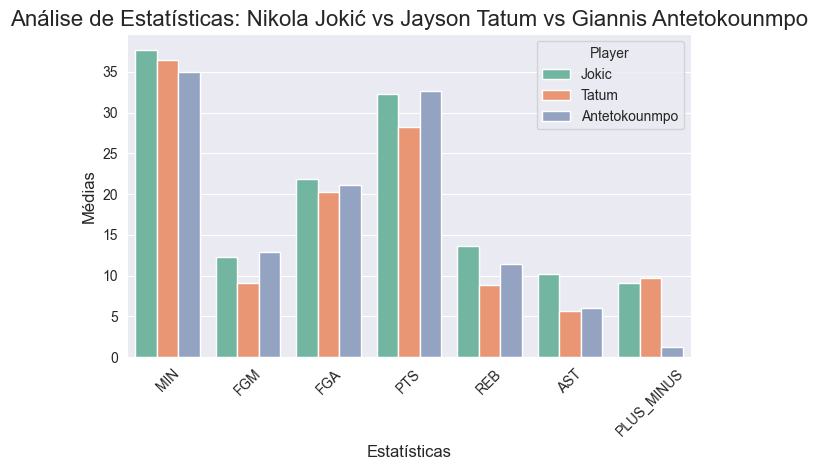

In [23]:
# Calculando as estatísticas médias para Jokić, Tatum e Antetokounmpo
average_stats_jokic = df_jokic.mean(numeric_only=True).round(1)
average_stats_tatum = df_tatum.mean(numeric_only=True).round(1)
average_stats_antetokounmpo = df_antetokounmpo.mean(numeric_only=True).round(1)

# Criando um DataFrame para o gráfico
comparison = pd.DataFrame({
    "Stat": average_stats_jokic.index,
    "Jokic": average_stats_jokic.values,
    "Tatum": average_stats_tatum.values,
    "Antetokounmpo": average_stats_antetokounmpo.values
})

# Transformando o DataFrame para formato longo (long format)
comparison_long = comparison.melt(id_vars="Stat", var_name="Player", value_name="Average")

# Gerando o gráfico de barras
sns.barplot(
    data=comparison_long,
    x="Stat",
    y="Average",
    hue="Player",
    palette=sns.color_palette("Set2", 3)
)

# Adicionando título e rótulos
plt.title("Análise de Estatísticas: Nikola Jokić vs Jayson Tatum vs Giannis Antetokounmpo", fontsize=16)
plt.ylabel("Médias", fontsize=12)
plt.xlabel("Estatísticas", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Player")
plt.tight_layout()

# Exibindo o gráfico
plt.show()



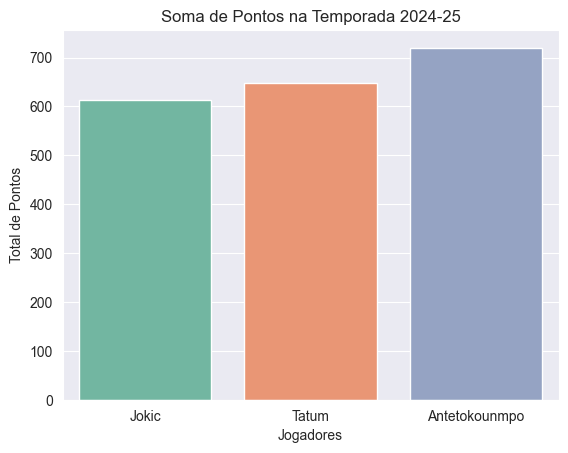

In [24]:
# Calcular o total de pontos de cada jogador
total_points_jokic = df_jokic['PTS'].sum()
total_points_tatum = df_tatum['PTS'].sum()
total_points_antetokounmpo = df_antetokounmpo['PTS'].sum()
players = ['Jokic', 'Tatum', 'Antetokounmpo']
total_points = [total_points_jokic, total_points_tatum, total_points_antetokounmpo]

# Plotar o gráfico de barras
sns.barplot(x=players, y=total_points, palette="Set2", hue=players, dodge=False, legend=False)
plt.title("Soma de Pontos na Temporada 2024-25")
plt.xlabel("Jogadores")
plt.ylabel("Total de Pontos")
plt.show()

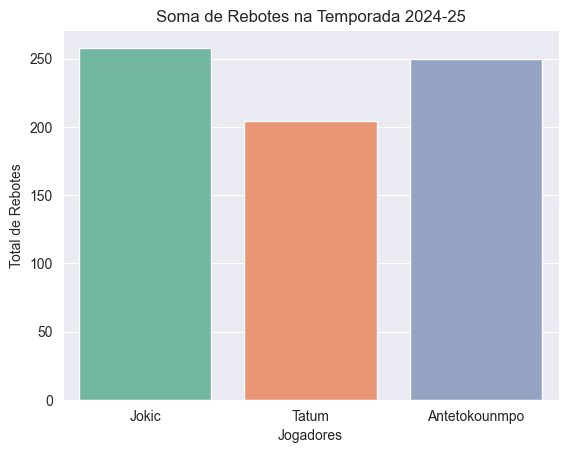

In [29]:
# Calcular o total de pontos de cada jogador
total_points_jokic = df_jokic['REB'].sum()
total_points_tatum = df_tatum['REB'].sum()
total_points_antetokounmpo = df_antetokounmpo['REB'].sum()
players = ['Jokic', 'Tatum', 'Antetokounmpo']
total_points = [total_points_jokic, total_points_tatum, total_points_antetokounmpo]

# Plotar o gráfico de barras
sns.barplot(x=players, y=total_points, palette="Set2", hue=players, dodge=False, legend=False)
plt.title("Soma de Rebotes na Temporada 2024-25")
plt.xlabel("Jogadores")
plt.ylabel("Total de Rebotes")
plt.show()